# New Book Adaptable Code tro generate plots

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase

import os


import seaborn as sns
import sqlite3

### Set the folder paths for the data
### DATA FOLDER PATHS
data_folder = '../../data/' # ROSTER DATA & GAME STATS
## IMAGES FOLDER PATHS
logo_folder = '../../images/logos/' 
background_folder = '../../images/backgrounds/'

# Roster Data Paths
roster_path_current = 'rosters/2023_master_roster.csv'
roster_path_previous = 'rosters/2022_master_roster.csv'
# Once the Database Clean and Transform code is updated to insert the roster, we can use the data from the database

# Game Stats Database Path
df_folder = '../../data/'
db_path = '2023_YTD_Game_Stats_Cleaned.db'

### Load the Data
- Current and Previous year's Roster
- Game Details Database for current year

In [2]:
## Load rosters into dataframes
df_current = pd.read_csv(data_folder + roster_path_current)
df_previous = pd.read_csv(data_folder + roster_path_previous)

## Connect to the Database
conn = sqlite3.connect(df_folder + db_path)


## HOTFIX#####
# Replace dashes with spaces in the School column of the roster dataframes
df_current['School'] = df_current['School'].str.replace('-', ' ')
df_previous['School'] = df_previous['School'].str.replace('-', ' ')

#### UNCHECK TO CHECK DATABASE CONTENTS
# ## List the tables in the database
# tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
# print(tables)


# Set Parameters for the charts
- Team Names
- Team Logos
- Background Image
- Transparentcy of the background
- Figure Size
- Font Styles
    - Once I nail down a style I am happy with I want to store this in a seperate file and import


In [3]:
## Set paramaeters

### Set Matchup Tag - This will be used as a folder name to save the charts
matchup_tag = 'MSU_OSU_NEW' #

## Teams to Highlight - Use dashes instead of spaces
team_1 = 'Michigan State' # 
team_1_abrv = 'MSU' #
team_2 = 'Ohio State' #
team_2_abrv = 'OSU' #

## Path to School Logos
team_1_logo =  'msu.png' #
team_2_logo =  'osu.png' #
team_logos = {team_1: logo_folder + team_1_logo, team_2: logo_folder + team_2_logo}

## Set Colors
team_1_color =  'darkgreen' # For Michigan State
team_2_color =  'darkred' # For Ohio State
team_colors = {team_1: team_1_color, team_2: team_2_color}
############ Eventaully want to create a dictionary of colors for each team and save in a file to import

team_abrv_mapping = {
    'Michigan State': 'MSU',
    'Ohio State': 'OSU'
}


### Create a disctionary called highlight_colors to store the colors for each team
### Do it this way so i can reuse code from MSU_Explore_and_Plot notebook
highlight_colors = {team_1_abrv: team_1_color, team_2_abrv: team_2_color}

#### Set Background Image
path_to_bg_image =  'msu_osu_2.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
bg_img = mpimg.imread(background_folder + path_to_bg_image)



# Adjust the default chart size and aspect ratio
### SET THE FIGURE SIZE OF THE CHARTS ###
fig_deafult_1 = (10, 8) # Original
fig_deafult_2 = (12, 10)
# Turn on/off the figure size by commenting/uncommenting the lines below
figure_size = fig_deafult_1
# figure_size = fig_deafult_2


################################
## FONT PARAMETERES
font_title_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 36}
font_label_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 16}
font_tick_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 20}
font_label_large_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 20}
font_tick_large_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 16}
#################################





## HELPER FUNCTIONS

In [4]:
    # Define a function to place logos at given coordinates
    def place_logo(image_path, xy, ax, zoom=0.3):
        img = plt.imread(image_path)
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
        ax.add_artist(ab)

# Physical Comparison Charts
- Compound box and whisker plots of Height & Weight both by Position and Class Rank

In [5]:
# df_current.head()

In [6]:
# # Create a filtered dataframe for Two Schools We want to highlight
df_filtered = df_current[(df_current['School'] == team_1) | (df_current['School'] == team_2)]

print(df_filtered.head())


     Unnamed: 0  No.              Name Yr.  Ht.  Wt.         DOB  \
736         NaN    8  Brickey, Scooter  Gr  6-4  215   5/27/1999   
737         NaN   93  Carfagna, Damien  So  6-0  185  12/12/2002   
738         NaN    7    Johnson, Brent  Jr  6-0  185   3/20/2003   
739         NaN    6       Klee, Mason  Gr  6-2  195   10/4/1999   
740         NaN    4      Larkin, John  So  6-2  190   1/26/2001   

               Hometown    Position  Height_Inches  Draft_Year NHL_Team  \
736  Burtchville, Mich.  Defensemen             76         NaN      NaN   
737    Wood Ridge, N.J.  Defensemen             72         NaN      NaN   
738       Dallas, Texas  Defensemen             72      2021.0      WSH   
739     Morrison, Colo.  Defensemen             74         NaN      NaN   
740      Detroit, Mich.  Defensemen             74         NaN      NaN   

     D_Round      Last Team League      School  
736      NaN     Des Moines   USHL  Ohio State  
737      NaN  New Hampshire    HEA  Ohio S

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel

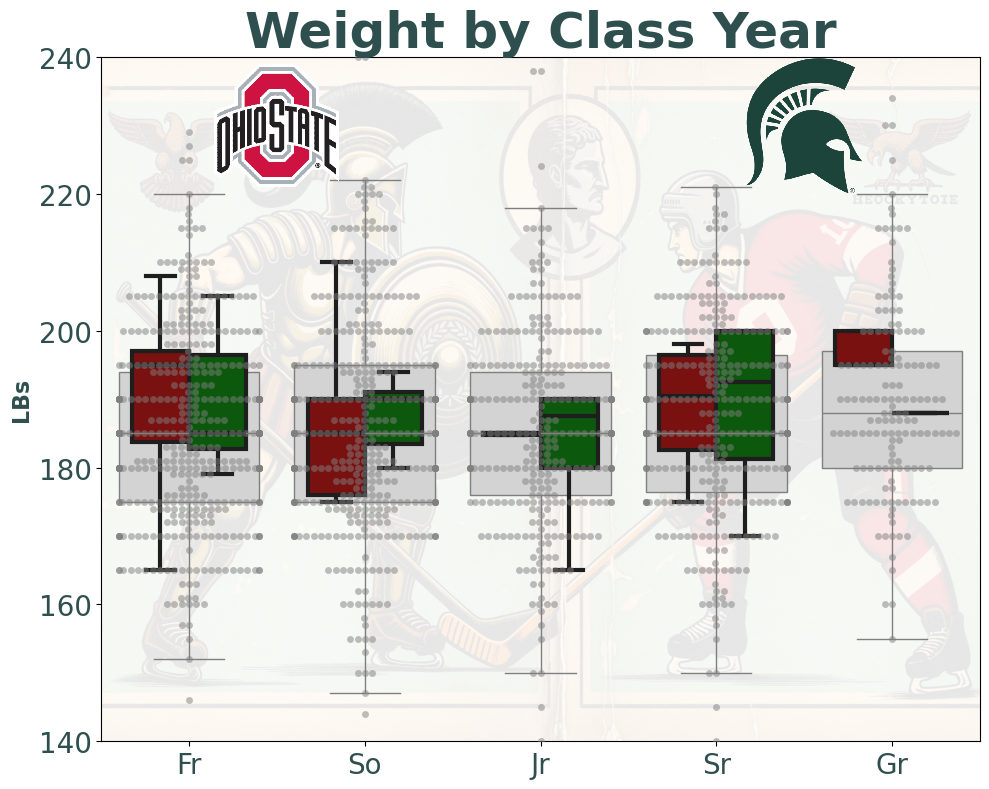

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\

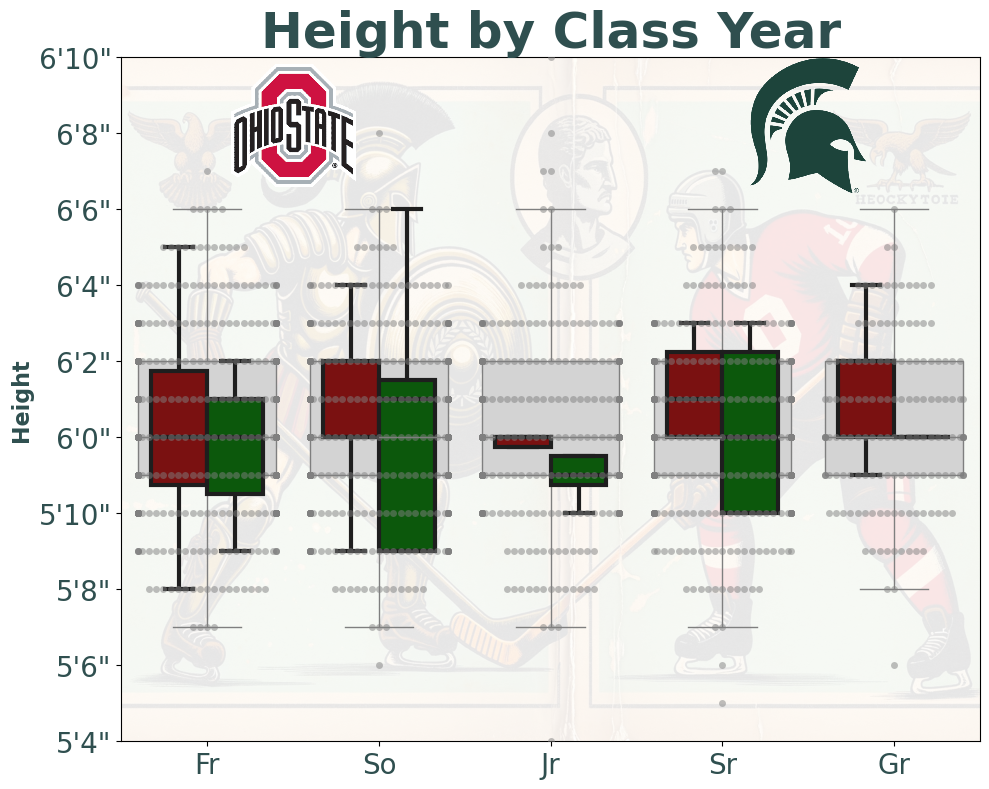

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\1238240832.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\1238240832.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick

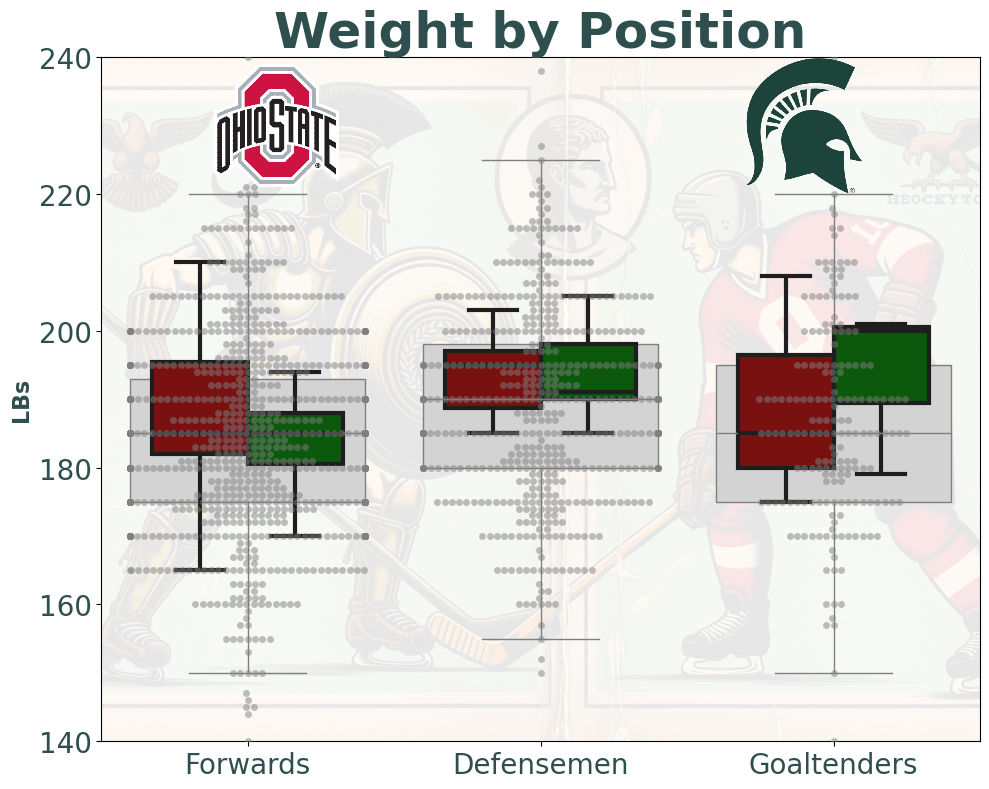

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\1238240832.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
C:\Users\Justin\App

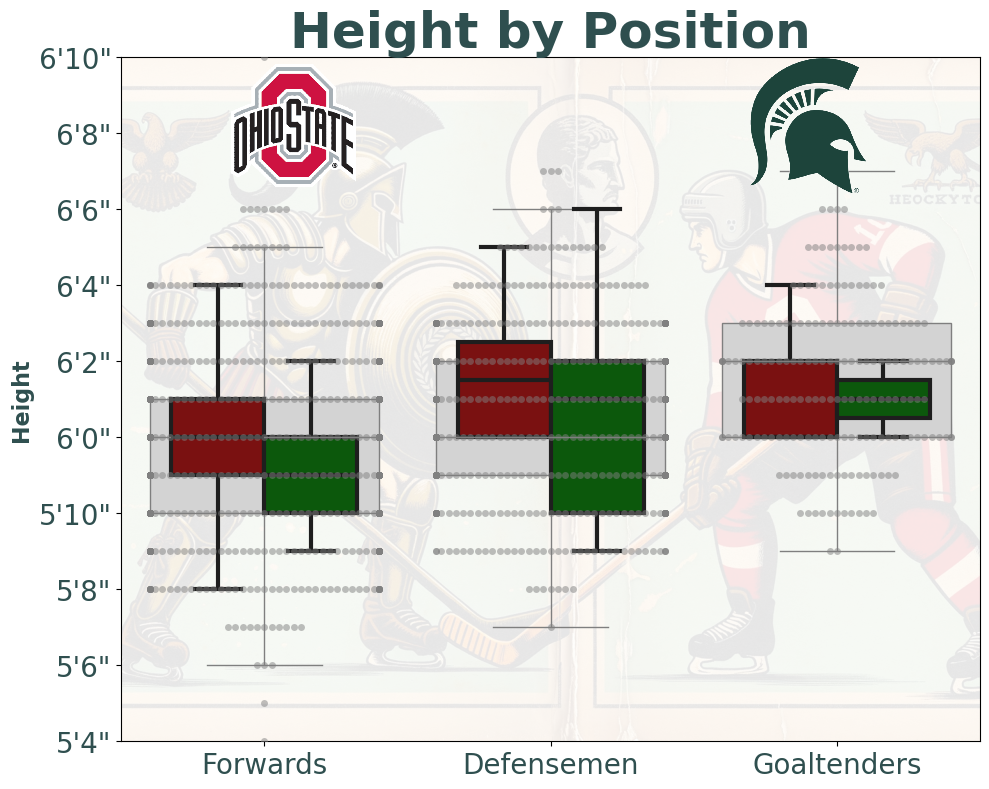

In [7]:
### Set the Output Folder for the images
TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

# Set the order of the positions
position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# Set the order of Class Rank
class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # Create a filtered dataframe for Two Schools We want to highlight
df_filtered = df_current[(df_current['School'] == team_1) | (df_current['School'] == team_2)]


########### Create the Plots ###########
def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER):
    
    # Create subplot
    fig, ax = plt.subplots(1, 1, figsize=figure_size)
    
    # Set Axis ranges
    ax.set_xlim([0, len(x_order)])

    # Background Image
    x_range = ax.get_xlim()
    y_min = df[y_col].min()
    y_max = df[y_col].max()
    ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=0.1, zorder=0)

    # Plots
    sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
    sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order)
    sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=3)

    # Titles and Labels
    ax.set_title(title, fontdict=font_title_param)
    ax.set_ylabel(y_label, fontdict=font_label_param)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
    ax.set_xlabel('')

    ########## Conver the tick marks to feet and inches in the Height Plots ##########
    # Check if y_col is for height and then apply the conversion
    if y_col == 'Height_Inches':
        ax.set_yticks(ax.get_yticks())
        ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

    
    # Get upper bounds of the axis
    x_max = ax.get_xlim()[1]
    y_max = ax.get_ylim()[1]

    # Define a function to place logos at given coordinates
    def place_logo(image_path, xy, ax, zoom=0.3):
        img = plt.imread(image_path)
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
        ax.add_artist(ab)

    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner


    # # # Drop Legend if there is any
    if ax.get_legend() is not None:
        ax.get_legend().remove()


    plt.tight_layout()
    save_path = f'{TEMP_FOLDER}'
    os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
    # Save Plot
    plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    
    plt.show()

# Weight by Class Rank:
generate_plot('Yr.', 'Wt.', 'Weight by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# Height by Class Rank:
generate_plot('Yr.', 'Height_Inches', 'Height by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# Weight by Position:
generate_plot('Position', 'Wt.', 'Weight by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# Height by Position:
generate_plot('Position', 'Height_Inches', 'Height by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)



# Statistical Plots
- Scatter plots for Goals, Assist, PIMs and Shots

- 

## Helper Functions

In [8]:

# Function to plot logos
def plot_logo(image, x, y, ax, zoom=0.15, zorder=100):
    img = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(img, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0, box_alignment=(0.5, 0.5), zorder=zorder)
    ax.add_artist(ab)

# Function to add logos to any plot
def add_logos_to_plot(df, x_col, y_col, team_colors, logo_mapping, ax):
        
    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = df[df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = df[df['Team'] == team_abrv_mapping[team]]
        
        if not team_data.empty:
            x, y = team_data[x_col].values[0], team_data[y_col].values[0]
            
            if team in logo_mapping:
                logo_img = mpimg.imread(logo_folder + logo_mapping[team])
                plot_logo(logo_img, x, y, ax)
            else:
                plt.scatter(x, y, color=color, s=100, zorder=5, marker='x')
        else:
            print(f"No data found for team {team}")


# Dictionary to map team names to their logo filenames
logo_mapping = {
    'Michigan State': 'msu.png',
    'Ohio State': 'osu.png'
}

### Query Definitions to be usesd in plots below

In [9]:
# Query to get the average goals scored and allowed per game for each team
avg_goals_query = """
SELECT
    a.Team,
    AVG(a.goalsT) AS Avg_Goals_Scored,
    AVG(b.goalsT) AS Avg_Goals_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)


C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\4236043004.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\4236043004.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


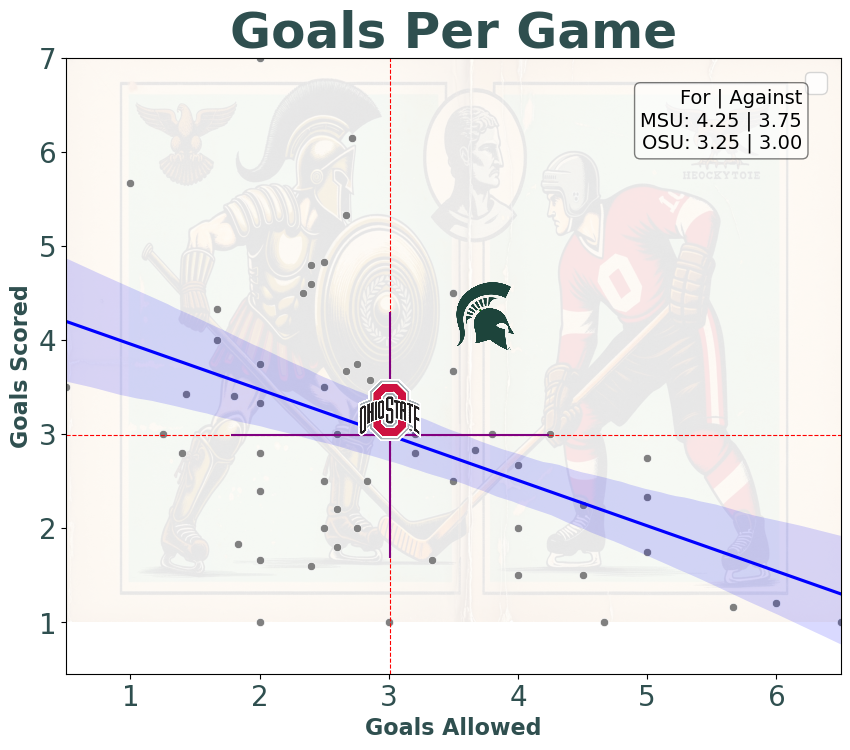

In [10]:

# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)

# Calculate average and standard deviation for "Goals Scored" and "Goals Allowed"
avg_goals_scored = avg_goals_df['Avg_Goals_Scored'].mean()
std_goals_scored = avg_goals_df['Avg_Goals_Scored'].std()
avg_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].mean()
std_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].std()


# Create the scatter plot with trend line, average, and standard deviation
fig, ax = plt.subplots(figsize=figure_size)  # Create a figure and a set of subplots, and get the Axes object.



# Set the background image
# You might need to adjust the extent based on your data's min and max values
plt.imshow(bg_img, aspect='auto', extent=[avg_goals_df['Avg_Goals_Allowed'].min(), 
                                          avg_goals_df['Avg_Goals_Allowed'].max(), 
                                          avg_goals_df['Avg_Goals_Scored'].min(), 
                                          avg_goals_df['Avg_Goals_Scored'].max()], 
                                          zorder=0, 
                                          alpha=alpha_value)



# Scatter plot
sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', color='grey')

# Add trend line
sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, yerr=std_goals_scored, color='purple', fmt='o')

# Highlight specific teams
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], color=color, s=100, zorder=5, marker='x')

plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], c='red', s=100, marker='o', zorder=99)


# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', team_colors, logo_mapping, ax=ax)



###########################
# Add a legend-like floating box in the upper right
# Create a multi-line summary text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    summary_text += f'{team}: {team_data["Avg_Goals_Scored"].values[0]:.2f} | {team_data["Avg_Goals_Allowed"].values[0]:.2f}\n'

# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Goals Per Game', font_title_param)
plt.xlabel('Goals Allowed', font_label_param)
plt.ylabel('Goals Scored', font_label_param)
# Tick labels
ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)

# Upsize the Legend Text
plt.legend(fontsize=20)

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# Save Plot
plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)

plt.show()

## Average Shots Per Game (for and Against)

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2406752300.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2406752300.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


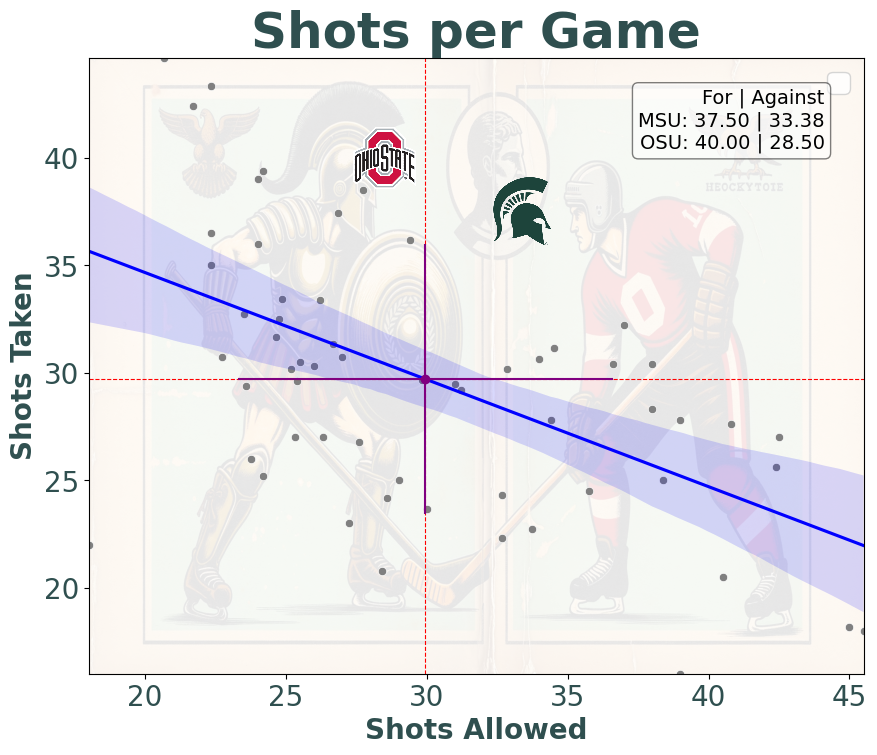

In [11]:
# Query to get the average shots taken and allowed per game for each team using the previous database connection
avg_shots_query = """
SELECT
    a.Team,
    AVG(a.shotsT) AS Avg_Shots_Taken,
    AVG(b.shotsT) AS Avg_Shots_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_shots_df = pd.read_sql(avg_shots_query, conn)

# Calculate average and standard deviation for "Shots Taken" and "Shots Allowed"
avg_shots_taken = avg_shots_df['Avg_Shots_Taken'].mean()
std_shots_taken = avg_shots_df['Avg_Shots_Taken'].std()
avg_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].mean()
std_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].std()

# Create the scatter plot
fig, ax = plt.subplots(figsize=figure_size)

# Set the background image
plt.imshow(bg_img, aspect='auto', extent=[avg_shots_df['Avg_Shots_Allowed'].min(), 
                                          avg_shots_df['Avg_Shots_Allowed'].max(), 
                                          avg_shots_df['Avg_Shots_Taken'].min(), 
                                          avg_shots_df['Avg_Shots_Taken'].max()], 
           zorder=0, alpha=alpha_value)


# Scatter plot
sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', color='grey')

# Add trend line
sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, yerr=std_shots_taken, color='purple', fmt='o')



# Highlight specific teams
for team, color in team_colors.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    if not team_data.empty:
        plt.scatter(team_data['Avg_Shots_Allowed'], team_data['Avg_Shots_Taken'], color=color, s=100, zorder=5, marker='x', label=f"{team}")


# Add logos
add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', team_colors, logo_mapping, ax=ax)

# Add a legend-like floating box in the upper right
# Create a multi-line summary text

# Update summary_text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    if not team_data.empty:
        summary_text += f'{team}: {team_data["Avg_Shots_Taken"].values[0]:.2f} | {team_data["Avg_Shots_Allowed"].values[0]:.2f}\n'
    else:
        print(f"No data found for team {team}")


# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Shots per Game', font_title_param)
plt.xlabel('Shots Allowed', font_label_large_param)
plt.ylabel('Shots Taken', font_label_large_param)
# Tick labels
ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)

# Upsize the Legend Text
plt.legend(fontsize=20)


save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
plt.show()


## Average Penelty Minutes (PIM) per Game

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\1854535427.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\1854535427.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)


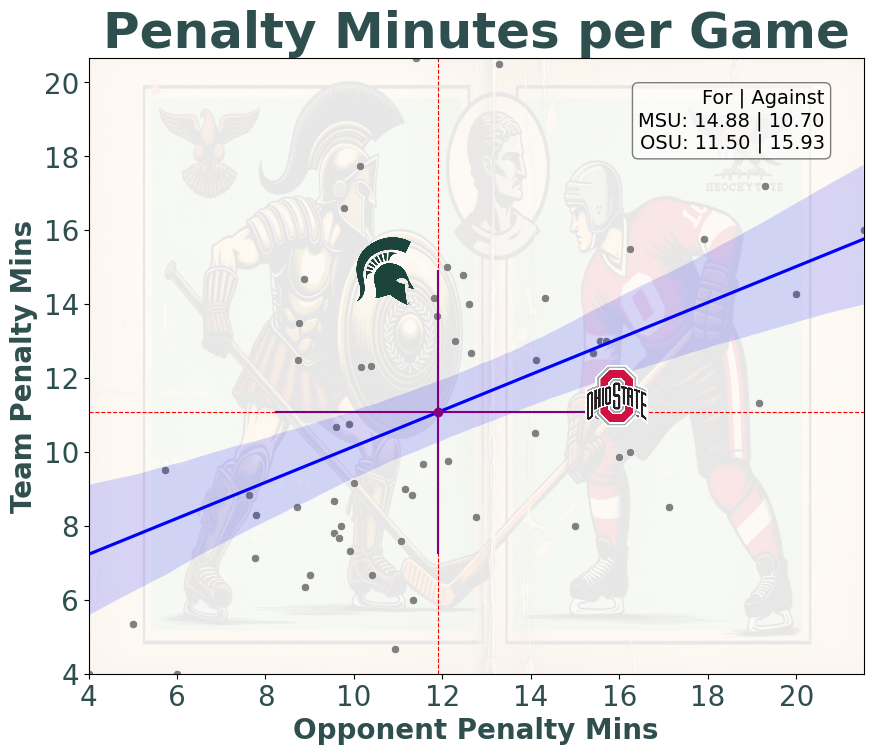

In [12]:
# SQL query to calculate the average penalty minutes "for" and "against" each team
avg_penalty_for_against_query = """
WITH PenaltyFor AS (
    SELECT
        Team,
        AVG(Total_Penalty_Minutes) AS Avg_Penalty_Minutes_For
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    )
    GROUP BY Team
),
PenaltyAgainst AS (
    SELECT
        b.Team,
        AVG(a.Total_Penalty_Minutes) AS Avg_Penalty_Minutes_Against
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    ) AS a
    JOIN penalty_summary AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY b.Team
)
SELECT
    a.Team,
    a.Avg_Penalty_Minutes_For,
    b.Avg_Penalty_Minutes_Against
FROM PenaltyFor AS a
JOIN PenaltyAgainst AS b ON a.Team = b.Team;
"""

# Execute the query and store the results in a DataFrame
avg_penalty_for_against_df = pd.read_sql(avg_penalty_for_against_query, conn)
# avg_penalty_for_against_df.head()

# Calculate average and standard deviation for "For" and "Against"
avg_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].mean()
std_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].std()
avg_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].mean()
std_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].std()

#####################################################
# Create the scatter plot
fig, ax = plt.subplots(figsize=figure_size)  # Create figure and axis object

# Scatter plot
sns.scatterplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', color='grey', ax=ax)


# Add Background Image
plt.imshow(bg_img, aspect='auto', extent=[avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].min(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].max(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].min(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].max()], 
                                          zorder=0, 
                                          alpha=alpha_value)

# Add trend line
sns.regplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_for, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_against, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_against, avg_for, xerr=std_against, yerr=std_for, color='purple', fmt='o')

# Highlight specific teams
for team, color in team_colors.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    plt.scatter(team_data['Avg_Penalty_Minutes_Against'], team_data['Avg_Penalty_Minutes_For'], color=color, s=100, zorder=5, marker='x')


# Update summary_text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    if not team_data.empty:
        summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.2f} | {team_data["Avg_Penalty_Minutes_Against"].values[0]:.2f}\n'
    else:
        print(f"No data found for team {team}")


# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# # Create a multi-line summary text
# summary_text = 'Penalty Mins For/Against\n'
# for team, color in team_colors.items():
#     team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
#     summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.2f}/{team_data["Avg_Penalty_Minutes_Against"].values[0]:.2f}\n'

# # Add the cohesive summary box
# plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=12, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# Add title and axis labels
plt.title('Penalty Minutes per Game', font_title_param)
plt.xlabel('Opponent Penalty Mins', font_label_large_param)
plt.ylabel('Team Penalty Mins', font_label_large_param)
# Tick labels
ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)

# Add logos
add_logos_to_plot(avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For', team_colors, logo_mapping, ax=ax)

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
plt.show()





## Histogram of When Goals are Scored

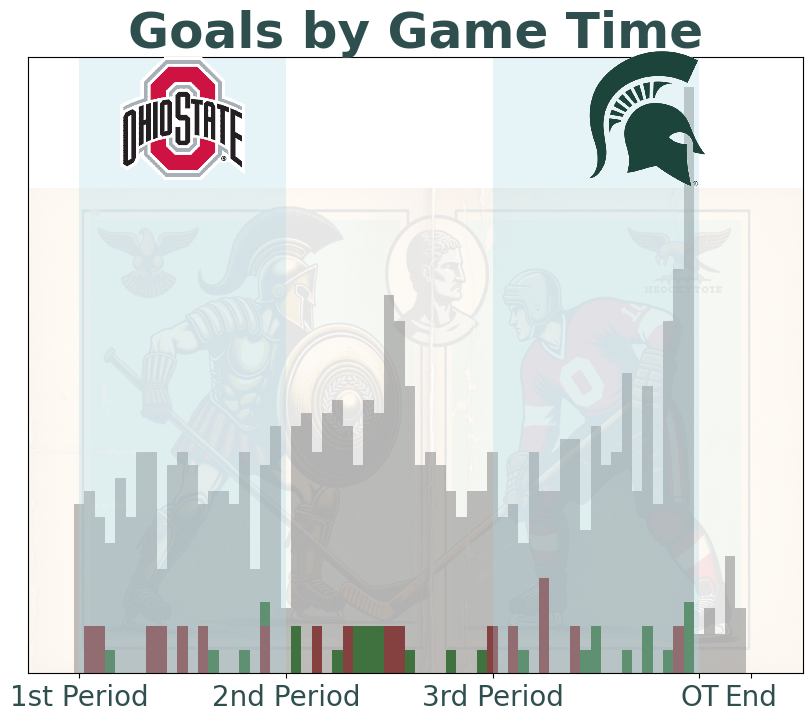

In [13]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def fetch_goals_time_data(conn):
    goals_time_query = """
    SELECT Team, Period, Time
    FROM scoring_summary;
    """
    return pd.read_sql(goals_time_query, conn)

def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    minutes, seconds = map(int, time.split(':'))
    
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:
        offset = 60
        
    return offset + minutes + seconds / 60.0

def plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value):
    goals_time_df['Continuous_Time'] = goals_time_df.apply(convert_to_continuous_time, axis=1)
    
    fig, ax = plt.subplots(figsize=figure_size)
    ax.imshow(bg_img, aspect='auto', extent=[-5, 70, 0, .6], zorder=0, alpha=alpha_value)

    all_teams_data = goals_time_df['Continuous_Time']
    bin_counts, bin_edges = np.histogram(all_teams_data, bins=range(0, 66))
    bin_avgs = bin_counts / len(np.unique(goals_time_df['Team']))

    # Moved this part below to plot it after the specific teams
    # ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = goals_time_df[goals_time_df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = goals_time_df[goals_time_df['Team'] == team_abrv_mapping[team]]
            
        if not team_data.empty:
            team_bin_counts, _ = np.histogram(team_data['Continuous_Time'], bins=range(0, 66))
            team_bin_avgs = team_bin_counts / len(team_data)  # Normalize by the number of goals by the team
            ax.bar(bin_edges[:-1], team_bin_avgs, width=1, alpha=1, label=f"{team} (Avg)", color=color)
        else:
            print(f"No data found for team {team}")


    ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    

    
    ax.axvspan(0, 20, facecolor='lightblue', alpha=0.3)
    # ax.axvspan(20, 40, facecolor='lightgreen', alpha=0.3)
    ax.axvspan(40, 60, facecolor='lightblue', alpha=0.3)
    # ax.axvspan(60, 65, facecolor='lightyellow', alpha=0.3)
    
    ax.set_title('Goals by Game Time', font_title_param)
    ax.set_xticks([0, 20, 40, 60, 65])
    ax.set_xticklabels(['1st Period', '2nd Period', '3rd Period', 'OT', 'End'], fontdict=font_tick_param)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    # Tick labels


    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
    
    save_path = f'{TEMP_FOLDER}'
    os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
    ## Get the string of the title and replace spaces with underscores
    title = plt.gca().get_title().replace(' ', '_')

    # Save Plot
    plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    plt.show()

# Usage
# conn = "your_database_connection_here"
# highlight_colors_shots = {"Team1": "red", "Team2": "blue"}  # Replace with actual team-color mapping
# figure_size = (12, 8)
# bg_img = "your_background_image_here"
# alpha_val = 0.5  # Adjust the alpha value as needed

goals_time_df = fetch_goals_time_data(conn)
plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value)


# Stats By Class Ranking

In [14]:
away_games_df = pd.read_sql("""
SELECT 
    Away_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Away
FROM game_details
GROUP BY Away_Team;
""", conn)

home_games_df = pd.read_sql("""
SELECT 
    Home_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Home
FROM game_details
GROUP BY Home_Team;
""", conn)


games_played_count = pd.merge(away_games_df, home_games_df, how='outer', on='Team')
games_played_count['Num_Games'] = games_played_count['Num_Games_Away'].fillna(0) + games_played_count['Num_Games_Home'].fillna(0)
games_played_count = games_played_count[['Team', 'Num_Games']]

games_played_count.tail()



Team  Num_Games
57         Duluth        3.0
58         Lowell        5.0
59  New Hampshire        5.0
60   North Dakota        6.0
61          Omaha        4.0

In [15]:
class_rank_stats_df = pd.read_sql("""
SELECT
    mr.Yr,
    ps.Team,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.Sh) AS Total_Shots,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.PIM) AS Total_PIM
    
FROM master_roster AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.Yr, ps.Team
ORDER BY mr.Yr, ps.Team;
""", conn)



final_df = pd.merge(class_rank_stats_df, games_played_count, how='left', on='Team')
# # # ## Calculate the average stats per class
final_df['AVG_Goals'] = final_df['Total_Goals'] / final_df['Num_Games']
final_df['AVG_Assists'] = final_df['Total_Assists'] / final_df['Num_Games']
final_df['AVG_Points'] = final_df['Total_Points'] / final_df['Num_Games']
final_df['AVG_PIM'] = final_df['Total_PIM'] / final_df['Num_Games']
final_df['AVG_Shots'] = final_df['Total_Shots'] / final_df['Num_Games']


final_df.head(20)

##### Create the filtered dataframe for the two teams we want to highlight
final_df_filtered = final_df[(final_df['Team'] == team_1) | (final_df['Team'] == team_2)]






## Descriptive Stats
# final_df.tail()

## Look at rows with Gr (Graduate) as the class rank
# final_df = final_df[final_df['Yr.'] == 'Gr']

# Filter to just Michigan State and Ohio State
# final_df = final_df[(final_df['Team'] == team_1) | (final_df['Team'] == team_2)]

## Descriptive Stats
# final_df.tail(20)
# final_df_filtered.tail()


In [16]:
print(class_rank_stats_df['Total_Shots'].dtypes)
print(games_played_count['Num_Games'].dtypes)

print(class_rank_stats_df.index)
print(games_played_count.index)

# drop row with Nan value
print(class_rank_stats_df.isnull().sum())
# class_rank_stats_df.dropna(inplace=True)



float64
float64
RangeIndex(start=0, stop=279, step=1)
RangeIndex(start=0, stop=62, step=1)
Yr               0
Team             5
Total_Goals      5
Total_Assists    5
Total_Shots      5
Total_Points     5
Total_PIM        5
dtype: int64


# Stats by Line and Position Section

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:57: UserWa

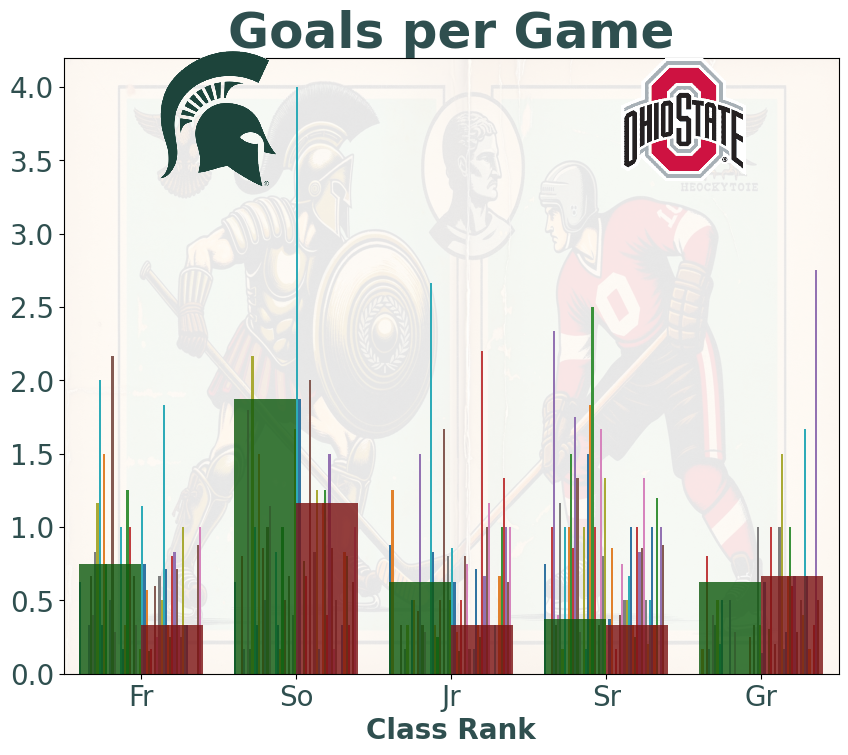

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:57: UserWa

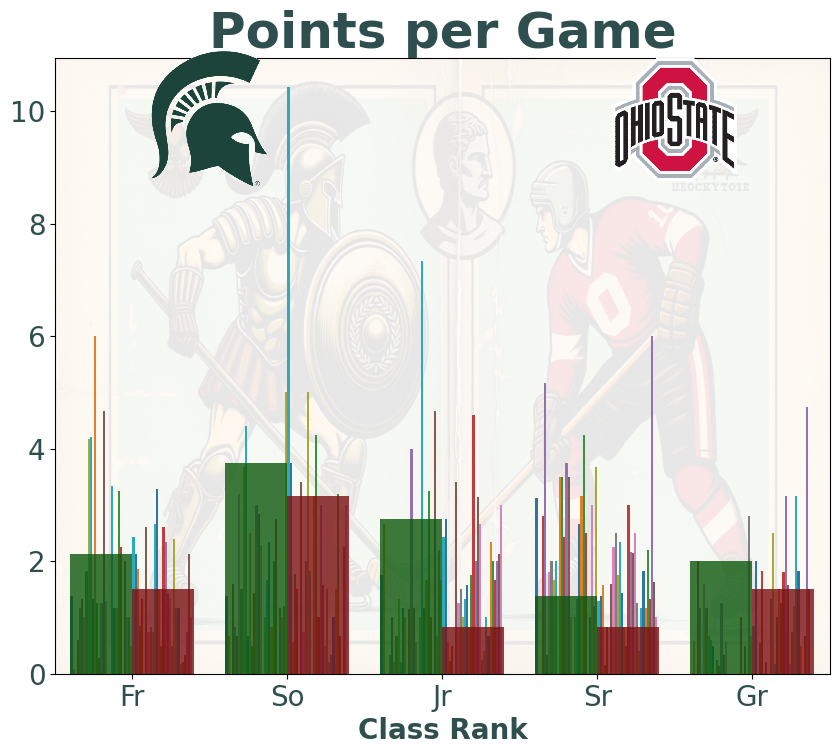

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:57: UserWa

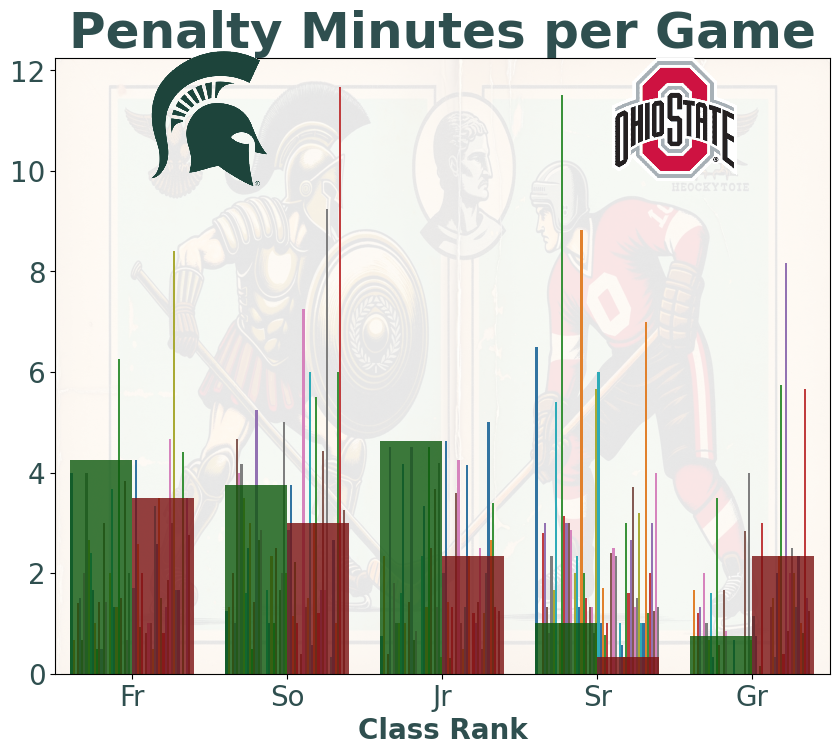

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2938302090.py:57: UserWa

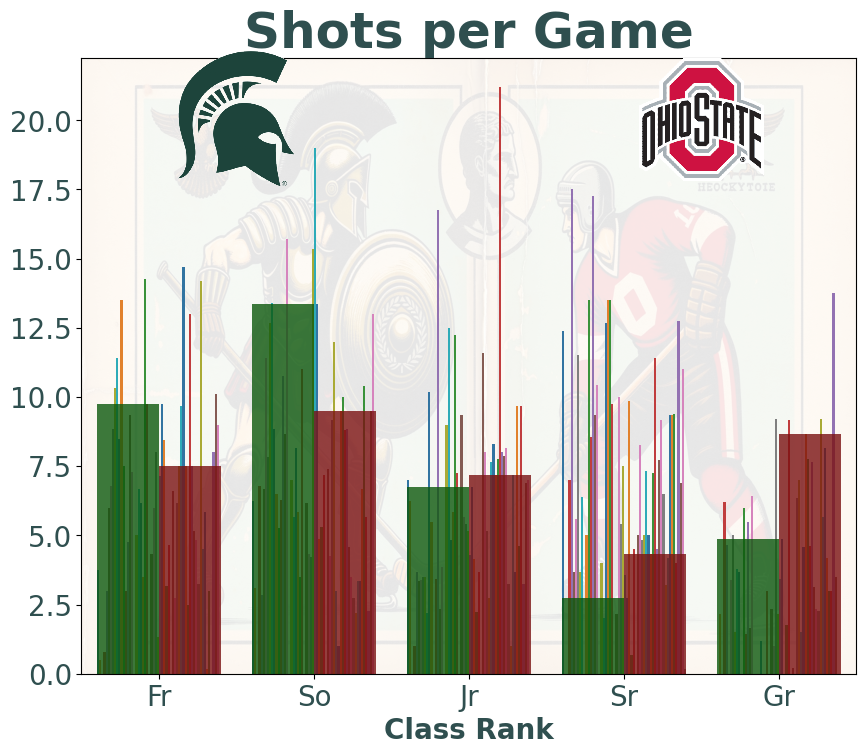

In [17]:
class_rank_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# Function to create individual plots for each metric
def create_metric_plot(metric, title, bg_img, alpha_value=alpha_value):
    fig, ax = plt.subplots(figsize=figure_size)
    

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)
    
    # Get the x and y limits after plotting the data
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Plot background image with updated extent
    plt.imshow(bg_img, aspect='auto', 
               extent=[x_min, x_max, y_min, y_max], 
               zorder=0, alpha=alpha_value)

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)

    # Overlay larger, more opaque bars for Michigan State and Boston College
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered, 
                palette=team_colors, ax=ax, ci=None, alpha=0.8, order=class_rank_order)

    # Add labels and title
    ax.set_xlabel('Class Rank', fontsize=14)
    ax.set_ylabel(title, fontsize=14)

    # Simplify the legend to only show Michigan State and Boston College
    handles, labels = ax.get_legend_handles_labels()
    # Only keep the last two handles for Michigan State and Boston College
    ax.legend(handles[-2:], labels[-2:], title='Team', fontsize='large', title_fontsize='28',
              # adjust the other font sizes
              labelspacing=1.5,  # increase spacing between items in the legend)
                borderpad=1,  # increase the spacing between the legend and the border
                # framealpha=1,  # increase transparency of the legend
                # bbox_to_anchor=(1.05, 1),  # move the legend to the right of the plot                
    )

    

    

    
    ## Apply the font parameters to the plot
    plt.title(title, font_title_param)
    plt.xlabel('Class Rank', font_label_large_param)
    plt.ylabel("", font_label_large_param)
    
    
    # Tick labels
    ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
    ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)
    

    # # # Drop Legend if there is any
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.20, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.80, 0.90), ax)  # Upper right corner


    # Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
    TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'
    plt.savefig(f'{TEMP_FOLDER}Class_Rank_{title}.png', bbox_inches='tight')
    

    # Show the plot
    plt.show()

# Create plots for Goals, Assists, PIM, and Shots
create_metric_plot('AVG_Goals', 'Goals per Game', bg_img, alpha_value)

create_metric_plot('AVG_Points', 'Points per Game', bg_img, alpha_value)
create_metric_plot('AVG_PIM', 'Penalty Minutes per Game', bg_img, alpha_value)
create_metric_plot('AVG_Shots', 'Shots per Game', bg_img, alpha_value)

## Stat Breakdown By Position and Line

In [18]:
## Get the table names from the database
table_names = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)

## Print the table names
print(table_names['name'].values)


['scoring_summary' 'penalty_summary' 'goalie_stats' 'player_stats'
 'line_chart' 'linescore' 'advanced_metrics_team1'
 'advanced_metrics_team2' 'game_details' 'player_stats_ytd'
 'master_roster' 'advanced_metrics_combined']


In [19]:
# Query to get line-specific stats for goals, assists, and penalty minutes scored for each team,
# now also including the Position column to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_query = """
SELECT
    lc.Team,
    lc.Line,
    lc.Position,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.PIM) AS Total_PIM,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.Sh) AS Total_Shots
FROM line_chart AS lc
LEFT JOIN player_stats AS ps ON lc.Game_ID = ps.Game_ID AND lc.Team = ps.Team AND lc.Player = ps.Player
WHERE lc.Position != 'Goalie'
GROUP BY lc.Team, lc.Line, lc.Position
ORDER BY lc.Team, lc.Line, lc.Position;
"""

# Execute the query and store the results in a DataFrame
line_goals_assists_pim_position_df = pd.read_sql(line_goals_assists_pim_position_query, conn)

# Create a new column 'Type' to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense')

# Step 1: Create 'Type' column
# (You've already done this part)
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(
    lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense'
)

# Step 2: Aggregate again by 'Type'
agg_columns = ['Total_Goals', 'Total_Assists', 'Total_PIM', 'Total_Points', 'Total_Shots']
grouped_df = line_goals_assists_pim_position_df.groupby(['Team', 'Line', 'Type'])[agg_columns].sum().reset_index()

# Now, you can merge the 'Num_Games' and calculate the averages as before
grouped_df = pd.merge(grouped_df, games_played_count, how='left', on='Team')

# Calculate the average stats per game
grouped_df['AVG_Goals'] = grouped_df['Total_Goals'] / grouped_df['Num_Games']
grouped_df['AVG_Assists'] = grouped_df['Total_Assists'] / grouped_df['Num_Games']
grouped_df['AVG_Points'] = grouped_df['Total_Points'] / grouped_df['Num_Games']
grouped_df['AVG_PIM'] = grouped_df['Total_PIM'] / grouped_df['Num_Games']
grouped_df['AVG_Shots'] = grouped_df['Total_Shots'] / grouped_df['Num_Games']

# Rename grouped_df to line_goals_assists_pim_position_df
line_goals_assists_pim_position_df = grouped_df

In [20]:
# ## Show me the distribution of AVG_Shots
# line_goals_assists_pim_position_df['AVG_Shots'].describe()

# # Histogram of AVG_Shots
# sns.histplot(data=line_goals_assists_pim_position_df, x='AVG_Shots', hue='Team', palette='tab10', bins=range(0, 10), multiple='stack')


## Goals per Game by Position

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2697413578.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2697413578.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2697413578.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\2697413578.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', 

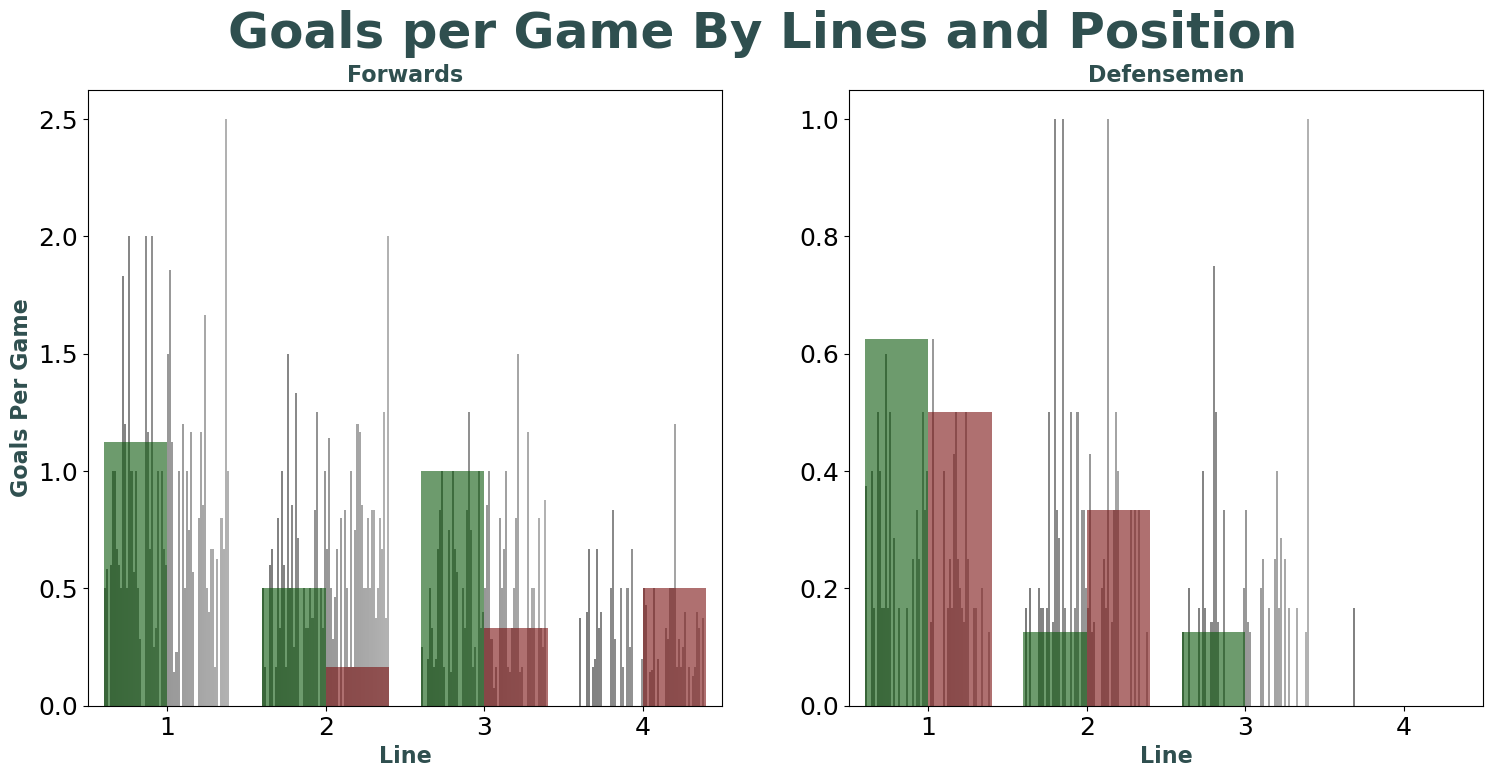

In [21]:
# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(18,8))
# set the font style for the title
title = fig.suptitle('Goals per Game By Lines and Position')
title.set_fontsize(36)
title.set_fontweight('bold')
title.set_color('darkslategray')


# Filter data for Forwards and Defensemen
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2])], 
            palette=team_colors, ax=ax[0], ci=None, alpha=0.6)

# Plot data for Defensemen
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2])], 
            palette=team_colors, ax=ax[1], ci=None, alpha=0.6)

# Add labels and title
ax[0].set_title('Forwards', font_label_param)
ax[1].set_title('Defensemen', font_label_param)
ax[0].set_xlabel('Line', font_label_param)
ax[1].set_xlabel('Line', font_label_param)
ax[0].set_ylabel('Goals Per Game', font_label_param)
ax[1].set_ylabel('', font_label_param)

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # Drop Legend if there is any
if ax[0].get_legend() is not None:
    ax[0].get_legend().remove()
if ax[1].get_legend() is not None:
    ax[1].get_legend().remove()

# Change font size of tick labels
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}Goals_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

## Points per Game by Position

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\305916534.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\305916534.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\305916534.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\305916534.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Points', 

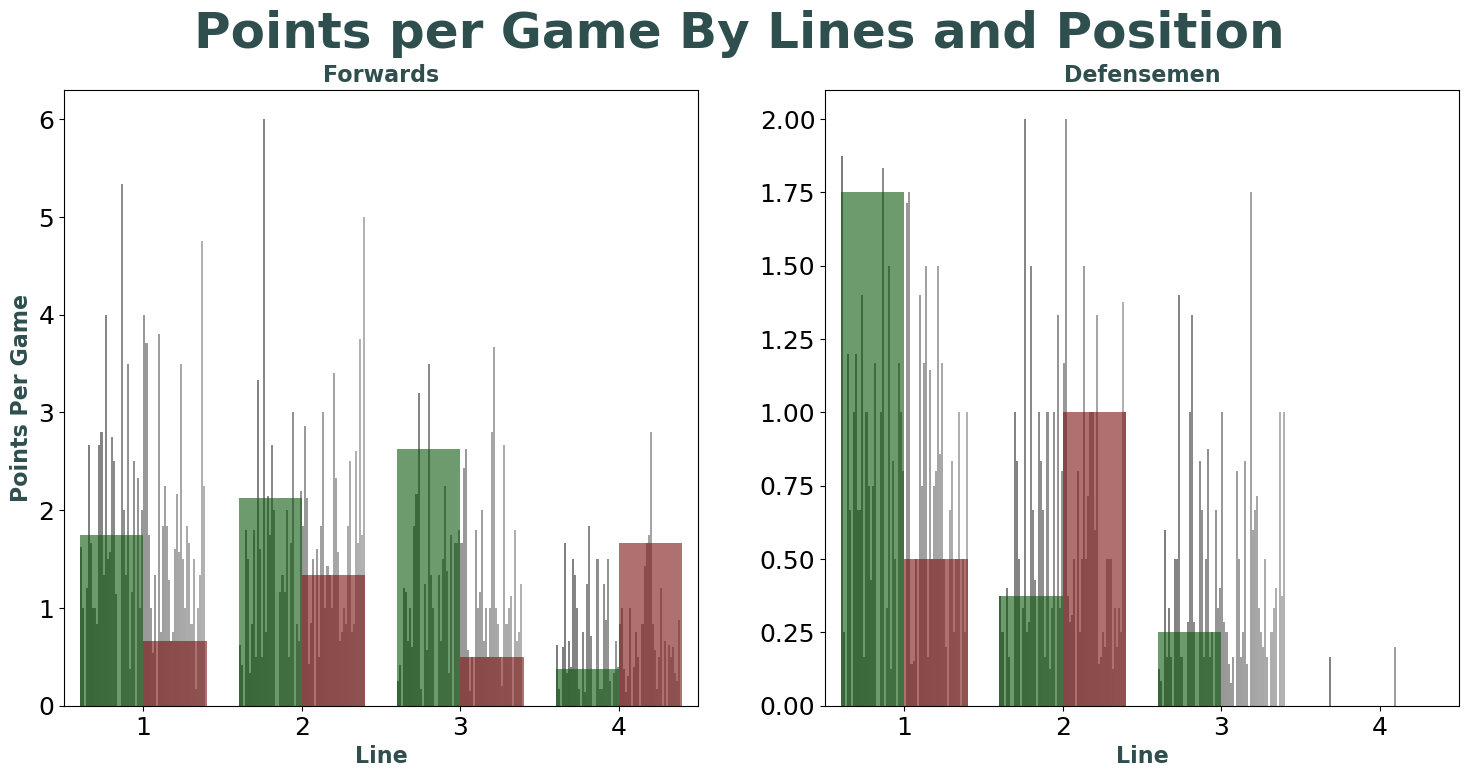

In [22]:
# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(18,8))
# set the font style for the title
title = fig.suptitle('Points per Game By Lines and Position')
title.set_fontsize(36)
title.set_fontweight('bold')
title.set_color('darkslategray')


# Filter data for Forwards and Defensemen
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2])], 
            palette=team_colors, ax=ax[0], ci=None, alpha=0.6)

# Plot data for Defensemen
sns.barplot(x='Line', y='AVG_Points', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='AVG_Points', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2])], 
            palette=team_colors, ax=ax[1], ci=None, alpha=0.6)

# Add labels and title
ax[0].set_title('Forwards', font_label_param)
ax[1].set_title('Defensemen', font_label_param)
ax[0].set_xlabel('Line', font_label_param)
ax[1].set_xlabel('Line', font_label_param)
ax[0].set_ylabel('Points Per Game', font_label_param)
ax[1].set_ylabel('', font_label_param)

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # Drop Legend if there is any
if ax[0].get_legend() is not None:
    ax[0].get_legend().remove()
if ax[1].get_legend() is not None:
    ax[1].get_legend().remove()

# Change font size of tick labels
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}Points_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

## Shots per Game by Position

C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\340067221.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\340067221.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\340067221.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_4592\340067221.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Shots', hue=

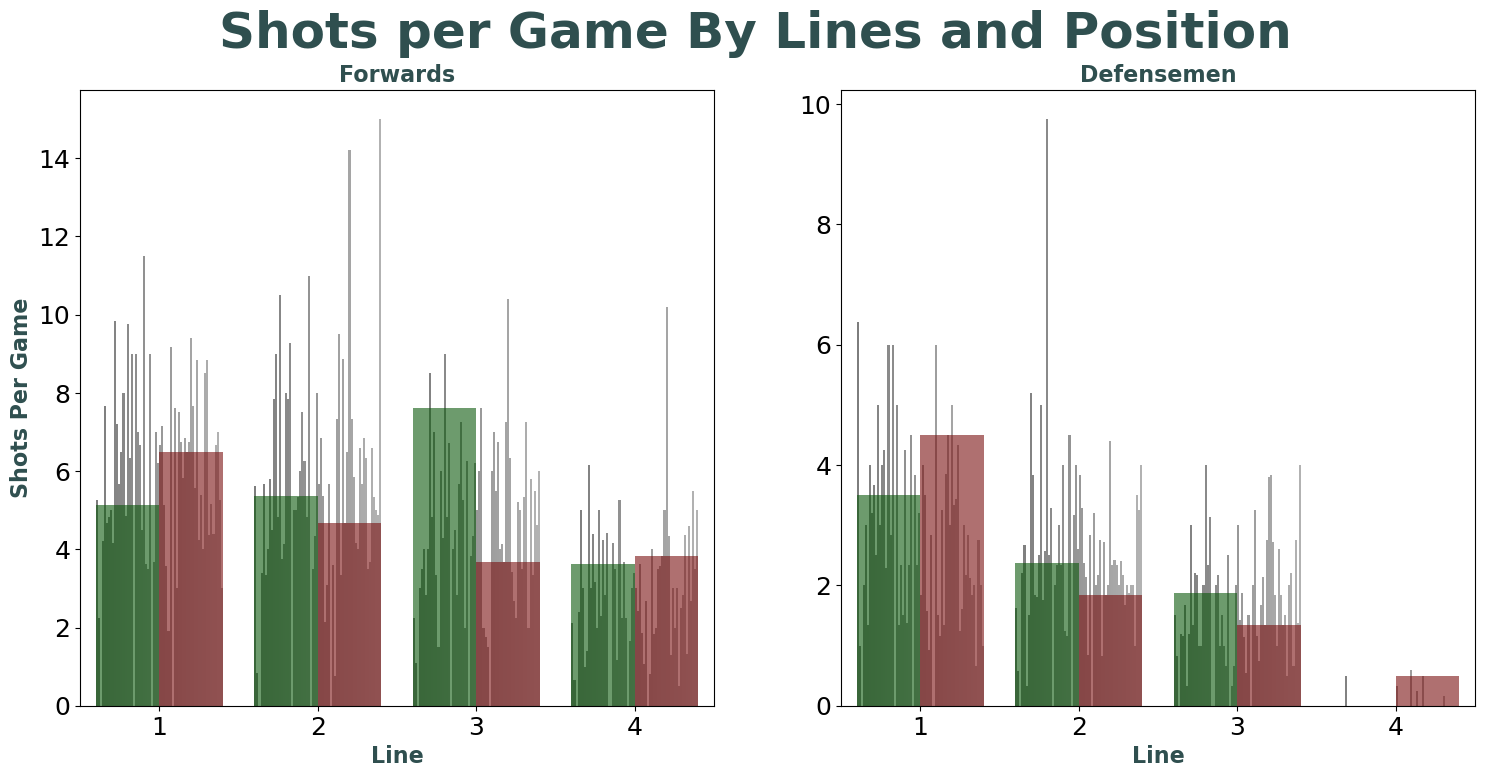

In [23]:
# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(18,8))
# set the font style for the title
title = fig.suptitle('Shots per Game By Lines and Position')
title.set_fontsize(36)
title.set_fontweight('bold')
title.set_color('darkslategray')


# Filter data for Forwards and Defensemen
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data, 
            color='grey', alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2])], 
            palette=team_colors, ax=ax[0], ci=None, alpha=0.6)

# Plot data for Defensemen
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=defense_data, 
            color='grey', alpha=0.6, ax=ax[1], ci=None)
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2])], 
            palette=team_colors, ax=ax[1], ci=None, alpha=0.6)

# Add labels and title
ax[0].set_title('Forwards', font_label_param)
ax[1].set_title('Defensemen', font_label_param)
ax[0].set_xlabel('Line', font_label_param)
ax[1].set_xlabel('Line', font_label_param)
ax[0].set_ylabel('Shots Per Game', font_label_param)
ax[1].set_ylabel('', font_label_param)

# Simplify the legend to only show Michigan State and Boston College
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[-2:], labels[-2:], title='Team')

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # Drop Legend if there is any
if ax[0].get_legend() is not None:
    ax[0].get_legend().remove()
if ax[1].get_legend() is not None:
    ax[1].get_legend().remove()

# Change font size of tick labels
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}Shots_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

In [24]:
################ CREATES SINGLE PLOTS AND DOE NOT BREAK DOWN BY LINE ############################
############# WILL PROBABLY DELETE THIS SECTION LATER ##########################################

# by_position_stats_df = pd.read_sql("""
# SELECT    
#     ps.Team,
#     mr.Position,
#     COALESCE(SUM(ps.G), 0) AS Total_Goals,
#     COALESCE(SUM(ps.A), 0) AS Total_Assists,
#     COALESCE(SUM(ps.Sh), 0) AS Total_Shots,
#     COALESCE(SUM(ps.G) + SUM(ps.A), 0) AS Total_Points,
#     COALESCE(SUM(ps.PIM), 0) AS Total_PIM
# FROM master_roster AS mr
# LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
# GROUP BY mr.Position, ps.Team
# ORDER BY mr.Position, ps.Team;
# """, conn)

# final_df_by_position = pd.merge(by_position_stats_df, games_played_count, how='left', on=['Team'])

# # # # ## Calculate the average stats per class
# final_df_by_position['AVG_Goals'] = final_df_by_position['Total_Goals'] / final_df_by_position['Num_Games']
# final_df_by_position['AVG_Assists'] = final_df_by_position['Total_Assists'] / final_df_by_position['Num_Games']
# final_df_by_position['AVG_Points'] = final_df_by_position['Total_Points'] / final_df_by_position['Num_Games']
# final_df_by_position['AVG_PIM'] = final_df_by_position['Total_PIM'] / final_df_by_position['Num_Games']
# final_df_by_position['AVG_Shots'] = final_df_by_position['Total_Shots'] / final_df_by_position['Num_Games']


# # final_df.head(20)

# # Filter to Just the highlighted teams
# final_df_filtered = final_df_by_position[(final_df_by_position['Team'] == team_1) | (final_df_by_position['Team'] == team_2)]

# def create_metric_plot_2(metric, title, bg_img, alpha_value=alpha_value):
#     fig, ax = plt.subplots(figsize=figure_size)
    

#     ax.set_xlabel('Position', fontsize=14)  # Changed from 'Class Rank'
#     sns.barplot(x='Position', y=metric, hue='Team', data=final_df_by_position, 
#                 palette='tab10', ax=ax, ci=None, order=position_order or sorted(final_df_by_position['Position'].unique()))

    
#     # Get the x and y limits after plotting the data
#     x_min, x_max = ax.get_xlim()
#     y_min, y_max = ax.get_ylim()

#     # Plot background image with updated extent
#     plt.imshow(bg_img, aspect='auto', 
#                extent=[x_min, x_max, y_min, y_max], 
#                zorder=0, alpha=alpha_value)

#     # # Plot data for all teams using the 'tab10' palette
#     # sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df_by_position, 
#     #             palette='tab10', ax=ax, ci=None, order=position_order)

#     # Overlay larger, more opaque bars for The Highlighted Teams
#     sns.barplot(x='Position', y=metric, hue='Team', data=final_df_filtered, 
#                 palette=team_colors, ax=ax, ci=None, alpha=0.8, order=position_order)

#     # Add labels and title
#     ax.set_xlabel('Position', font_label_param)  # Changed from 'Class Rank'
#     ax.set_ylabel(title, font_label_param)

#     # Tick labels
#     ax.set_xticklabels(ax.get_xticklabels(), **font_tick_param)
#     ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)

#     # Simplify the legend to only show The Highlighted Teams
#     handles, labels = ax.get_legend_handles_labels()
#     # Only keep the last two handles for The Highlighted Teams
#     ax.legend(handles[-2:], labels[-2:], title='Team', fontsize='large', title_fontsize='28',
#               # adjust the other font sizes
#               labelspacing=1.5,  # increase spacing between items in the legend)
#                 borderpad=1,  # increase the spacing between the legend and the border
#                 # framealpha=1,  # increase transparency of the legend
#                 # bbox_to_anchor=(1.05, 1),  # move the legend to the right of the plot                
#     )


# ## Call the function to create the plots
# create_metric_plot_2('AVG_Goals', 'Goals per Game', bg_img, alpha_value)
# create_metric_plot_2('AVG_Points', 'Points per Game', bg_img, alpha_value)
# create_metric_plot_2('AVG_PIM', 'Penalty Minutes per Game', bg_img, alpha_value)
# create_metric_plot_2('AVG_Shots', 'Shots per Game', bg_img, alpha_value)
